<a href="https://colab.research.google.com/github/Dongjin-1203/LLM_basic/blob/main/Simple_MLpipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습: ML 파이프라인 구축

kaggle의 "Credit Card Fraud Detection(신용카드 사기 탐지)"데이터셋을 이용한 ML파이프라인 구축을 해보겠다. 이 실습은 철저한 EDA를 통한 모델개발 및 학습을 하고 좋은 성능을 이끌어 내는것이 아닌 ML 파이프라인을 간단해도 직접 만들어보고 이해하는 것이 목적이다.

## 1. 초기 설정

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jidongjin","key":"6633f0de92082e56809663dda290a0c5"}'}

In [4]:
# Make a directory named kaggle and copy the kaggle. json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
  0% 0.00/66.0M [00:00<?, ?B/s]
100% 66.0M/66.0M [00:00<00:00, 1.20GB/s]


In [10]:
!unzip -q creditcardfraud.zip
print("데이터셋 다운로드 및 압축해제 완료!")

데이터셋 다운로드 및 압축해제 완료!


In [7]:
# Google Drive 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
# 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

## ML 파이프라인 코드

In [57]:
# 파이프라인 구조 예시
class SimpleMLPipeline:
    def __init__(self, path):
        self.df = None
        self.path = path

    def load_data(self):
        # 데이터 로딩
        self.df = pd.read_csv(self.path)
        return self.df

    def visualization(self):
        # 시각화
        plt.figure(figsize=(14, 12))

        # 클래스 분포
        # plt.figure(figsize=(6, 4))
        plt.subplot(2, 2, 1)
        class_counts = self.df['Class'].value_counts()
        sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
        plt.title('Class Distribution')
        plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
        for i, v in enumerate(class_counts.values):
            plt.text(i, v + 200, f'{v} ({v/self.df.shape[0]*100:.4f}%)', ha='center')

        # 상관관계 히트맵
        # plt.figure(figsize=(14, 10))
        plt.subplot(2, 2, 2)
        corr = self.df.corr()
        sns.heatmap(corr, cmap='coolwarm_r', annot=False)
        plt.title('Correlation Heatmap')

        # 상관관계 top 10
        corr_target = corr['Class'].drop('Class')
        top_features = corr_target.abs().sort_values(ascending=False).head(10)

        #plt.figure(figsize=(10, 6))
        plt.subplot(2, 2, 3)
        sns.barplot(x=top_features.values, y=top_features.index, palette='coolwarm')
        plt.title("Top 10 Features Correlated with 'Class'")
        plt.xlabel("Correlation coefficient (absolute)")

        # Class, Amount KDEplot
        plt.subplot(2, 2, 4)
        sns.kdeplot(self.df[self.df['Class'] == 0]['Amount'], label='Non-Fraud', shade=True)
        sns.kdeplot(self.df[self.df['Class'] == 1]['Amount'], label='Fraud', shade=True)
        plt.title('Transaction Amount Distribution by Class')
        plt.legend()

        plt.suptitle('EDA Result', fontsize=16)
        plt.tight_layout()
        plt.show()

        # 특성 공학
        self.df['Hour'] = (self.df['Time'] // 3600) % 24
        self.df.drop('Time', axis=1, inplace=True)

        # =========== 시각화 ===========
        plt.figure(figsize=(10, 4))
        sns.histplot(data=self.df, x='Hour', hue='Class', bins=24, multiple='stack')
        plt.title('Transaction Hour Distribution by Class')
        plt.xlabel('Hour of the Day')
        plt.ylabel('Transaction Count')
        plt.show()

        plt.figure(figsize=(22, 14))

        plt.subplot(1, 2, 1)
        sns.boxplot(x='Class', y='V14', data=self.df, palette='Set2')
        plt.title("Boxplot of V14 by Class")

        plt.subplot(1, 2, 2)
        sns.boxplot(x='Class', y='V17', data=self.df, palette='Set3')
        plt.title("Boxplot of V17 by Class")

        plt.suptitle('Feature Engineering Result', fontsize=16)
        plt.tight_layout()
        plt.show()

    def preprocess_data(self):
        # 데이터 전처리
        pass

    def train_model(self):
        # 모델 학습
        pass

    def evaluate_model(self):
        # 모델 평가
        pass

    def save_artifacts(self):
        # 모델 및 결과 저장
        pass

    def run_pipeline(self):
        # 전체 파이프라인 실행
        pass

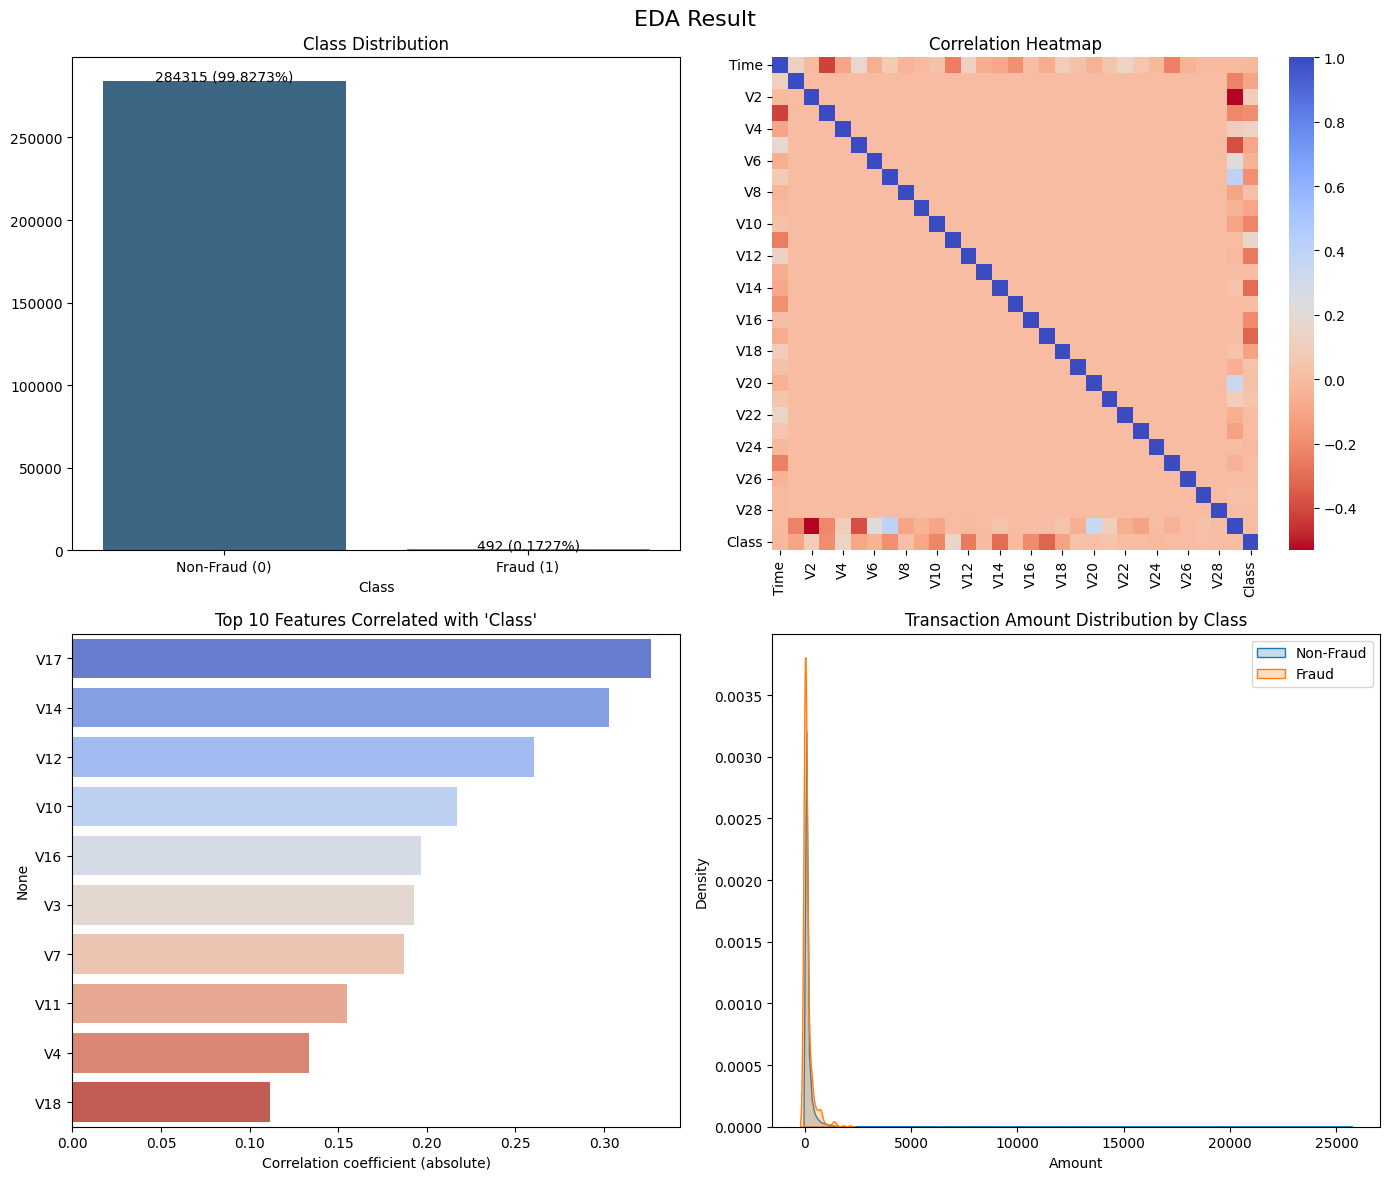

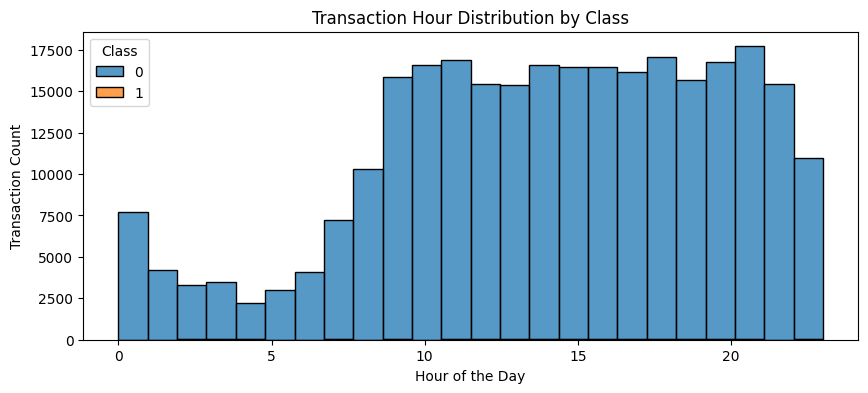

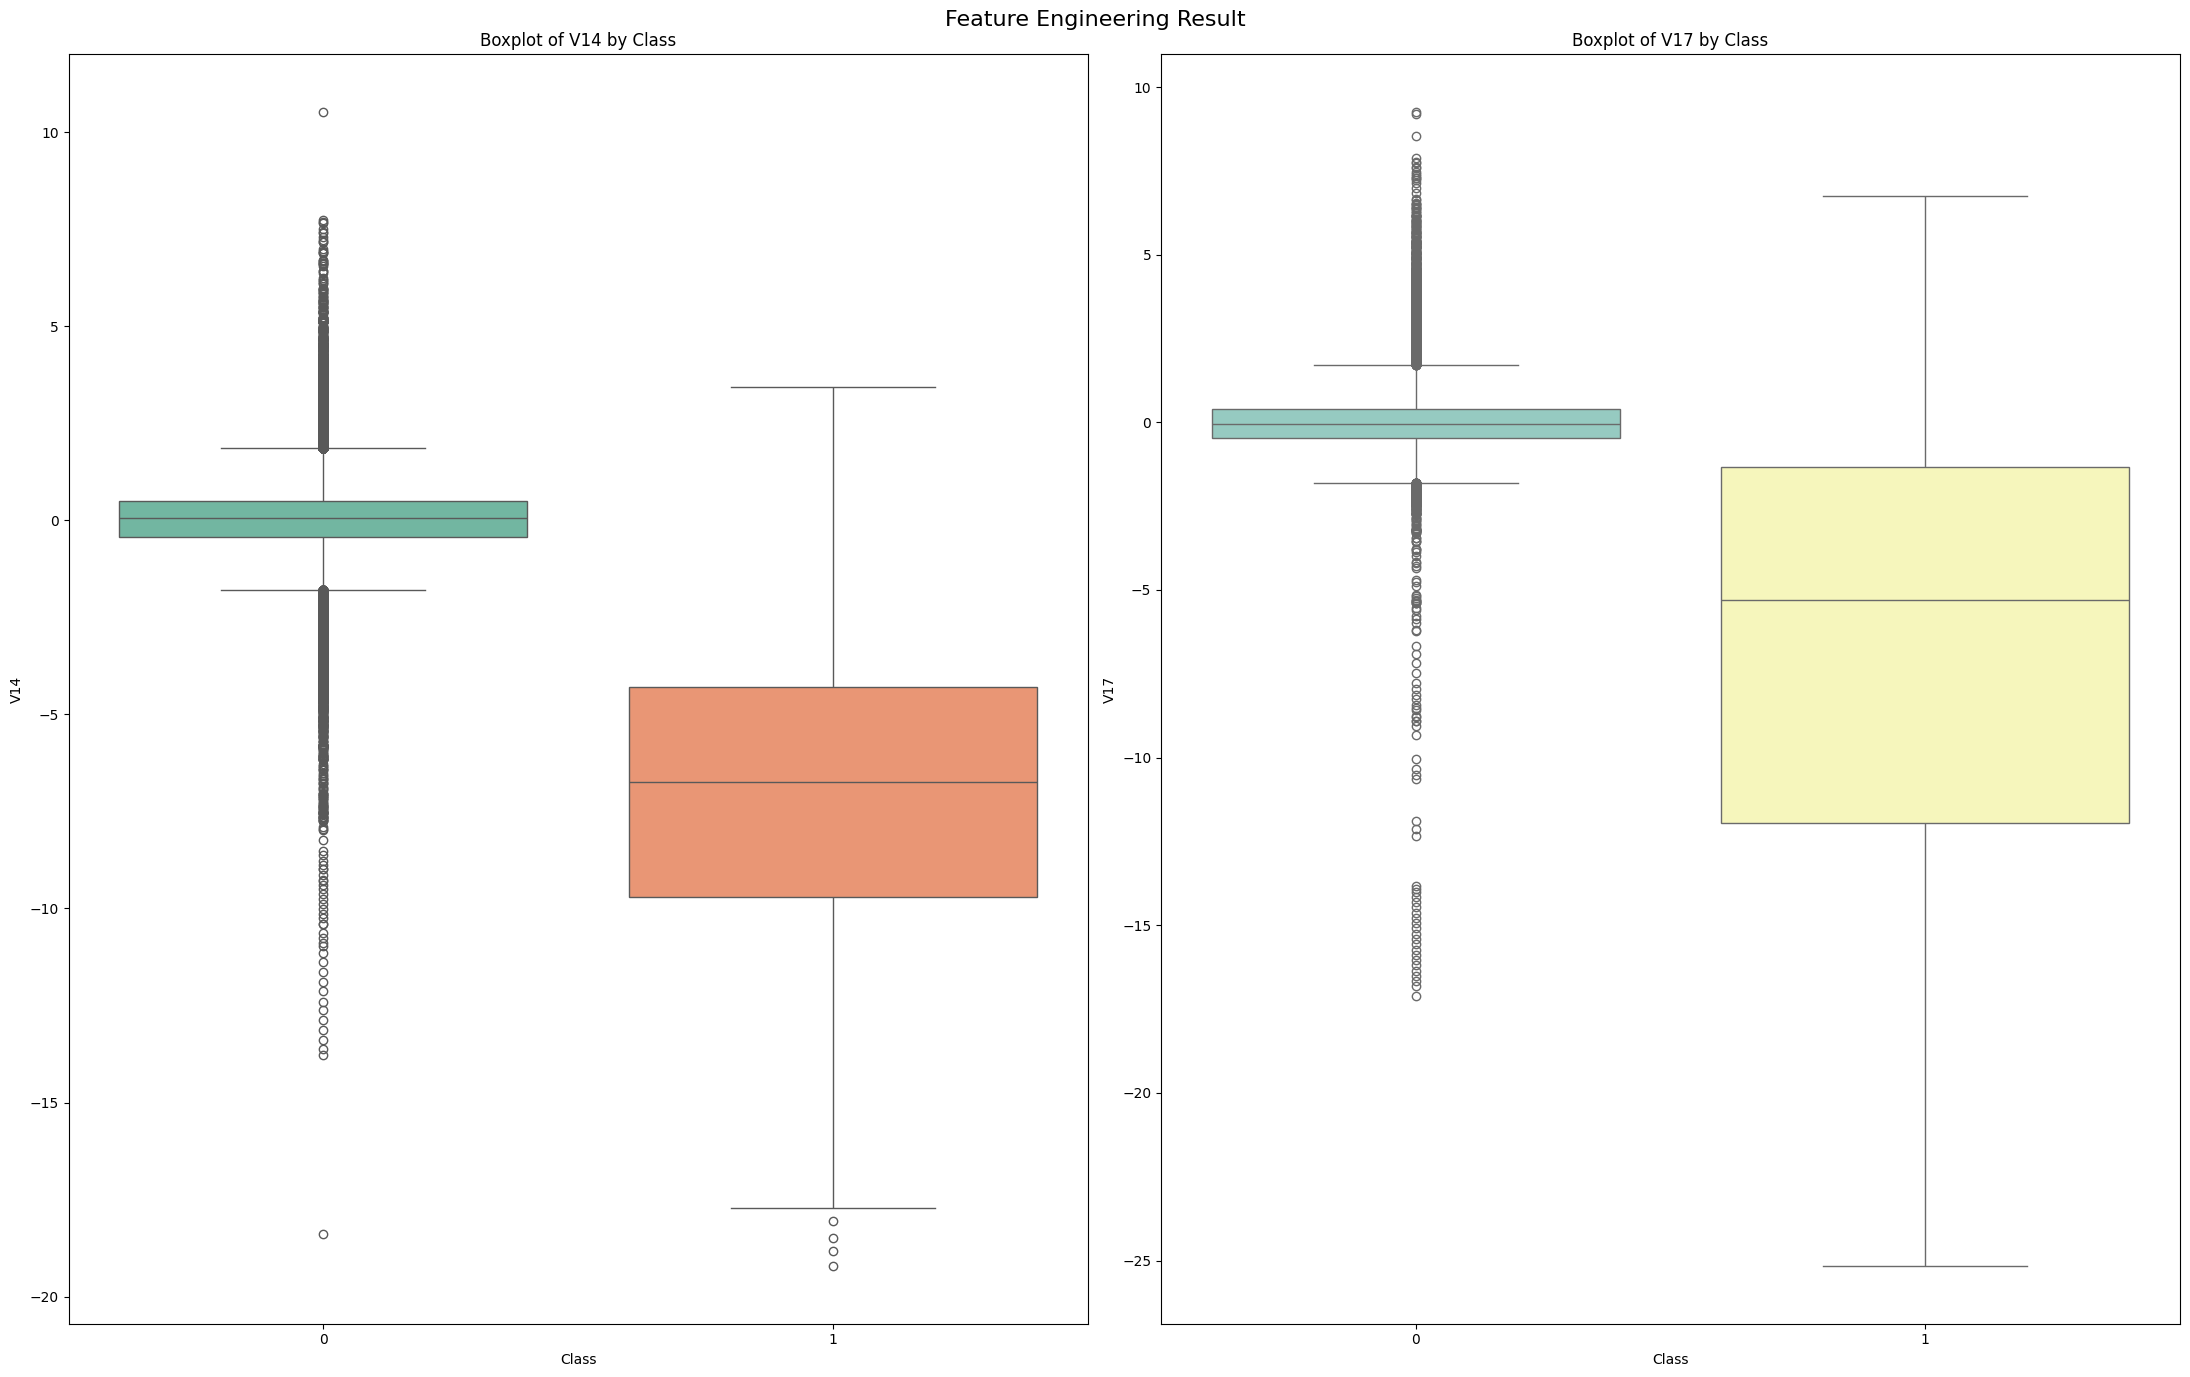

In [59]:
if __name__ == "__main__":
    path = "./creditcard.csv"
    pipe = SimpleMLPipeline(path= path)
    pipe.load_data() # Load the data first
    graph = pipe.visualization()
    graph